## 유튜브 랭킹 데이터 수집하기
```2021.12.11 version```

### 데이터 수집하기

#### 필요한 라이브러리 추가하기

In [74]:
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd

#### 크롬브라우저 실행하기

In [75]:
browser = webdriver.Chrome('C:/Users/data_test/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

C:\Users\skygg\AppData\Local\Temp/ipykernel_18244/361951788.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Users/data_test/chromedriver.exe')


#### HTML 다운로드 및 BeauifulSoup으로 읽기

In [76]:
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

#### 채널목록 태그 추출하기

In [77]:
channel_list= soup.select(' form > table > tbody > tr')
print(len(channel_list))

100


#### 채널목록 태그구조 확인하기

In [78]:
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLS48A09N2xyM8i9JeIfYCWsd-13csflXwYa8XAmoA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLS48A09N2xyM8i9JeIfYCWsd-13csflXwYa8XAmoA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

#### 카테고리 정보 추출하기

In [79]:
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


#### 채널명 찾아오기

In [80]:
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


#### 구독자 수, View 수, 동영상 수 추출하기

In [81]:
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7040만
215억0489만
395개


#### 반복문으로 채널 정보 추출하기

In [83]:
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 7040만 215억0489만 395개
HYBE LABELS [음악/댄스/가수] 6310만 205억5032만 727개
BANGTANTV [음악/댄스/가수] 6170만 141억4146만 1,646개
SMTOWN [음악/댄스/가수] 2930만 230억4716만 3,781개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2460만 69억3818만 3,406개
1theK (원더케이) [음악/댄스/가수] 2370만 213억7973만 15,706개
JYP Entertainment [음악/댄스/가수] 2310만 150억4884만 1,429개
Mnet K-POP [음악/댄스/가수] 1900만 140억0019만 26,851개
JFlaMusic [음악/댄스/가수] 1740만 35억0548만 281개
KBS WORLD TV [TV/방송] 1720만 129억2234만 54,023개
Jane ASMR 제인 [음식/요리/레시피] 1550만 55억2336만 1,304개
officialpsy [음악/댄스/가수] 1530만 88억4958만 91개
AdeleVEVO [미분류] 1520만 105억3233만 49개
BIGBANG [음악/댄스/가수] 1390만 68억3992만 773개
TWICE [음악/댄스/가수] 1260만 27억0747만 707개
Saturday Night Live [미분류] 1250만 125억8059만 7,778개
Hongyu ASMR 홍유 [음식/요리/레시피] 1100만 31억6311만 422개
Nao FunFun [키즈/어린이] 1070만 447만 37개
Stone Music Entertainment [음악/댄스/가수] 1020만 82억8621만 8,357개
DuDuPopTOY [키즈/어린이] 1010만 45억2912만 1,911개
핑크퐁 (인기 동요・동화) [키즈/어린이] 996만 60억1269만 2,394개
MBCkpo

IndexError: list index out of range

#### 페이지별 URL 만들기

In [84]:
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


#### 반복문으로 유튜브 랭킹 화면의 여러 페이지 크롤링하기(최종 코드)

In [85]:
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2) # 화면이 정상적으로 로딩된 후 HTML문서를 가져오기 위헤 기다림
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

#### 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기

In [87]:
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('youtube_rank.xlsx', index = False)

### 데이터 시각화 하기

#### 라이브러리 추가하기

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

#### 그래프에서 한글을 표기하기 위한 글꼴 변경

In [107]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

####  엑셀 파일 불러오기

In [88]:
df = pd.read_excel('youtube_rank.xlsx')

#### 데이터 살펴보기

In [91]:
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7040만,215억0489만,395개
1,HYBE LABELS,[음악/댄스/가수],6310만,205억5032만,727개
2,BANGTANTV,[음악/댄스/가수],6170만,141억4146만,"1,646개"
3,SMTOWN,[음악/댄스/가수],2930만,230억4716만,"3,781개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [90]:
df.tail()

,title,category,subscriber,view,video
995,Reynah,[음악/댄스/가수],55만,1억4888만,246개
996,J.Y. Park,[TV/방송],55만,9373만,90개
997,[ALTUBE] 김성현TV,[게임],55만,4억2210만,"2,121개"
998,방앗간 비둘기,[게임],55만,3억5690만,"4,381개"
999,빅헤드,[게임],55만,3억2660만,"3,540개"


In [93]:
# 구독자 수 앞에 10개 보기
df['subscriber'][0:10] 

0    7040만
1    6310만
2    6170만
3    2930만
4    2650만
5    2460만
6    2370만
7    2310만
8    1900만
9    1740만
Name: subscriber, dtype: object

In [95]:
# 문자 대체하기(replace)
df['subscriber'].str.replace('만', '0000')[0:10] # 문자 '만'을 '0000'으로 변경

0    70400000
1    63100000
2    61700000
3    29300000
4    26500000
5    24600000
6    23700000
7    23100000
8    19000000
9    17400000
Name: subscriber, dtype: object

In [98]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [99]:
# Serier 데이터 타입 변환하기(astype)
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


#### 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기

In [100]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],93020000,65
[IT/기술/컴퓨터],8410000,8
[TV/방송],242000000,144
[게임],71030000,70
[교육/강의],24780000,22


In [101]:
# 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93020000,65
[IT/기술/컴퓨터],8410000,8
[TV/방송],242000000,144
[게임],71030000,70
[교육/강의],24780000,22


In [102]:
# 데이터프레임의 인덱스 초기화(reset_index)
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],93020000,65
1,[IT/기술/컴퓨터],8410000,8
2,[TV/방송],242000000,144
3,[게임],71030000,70
4,[교육/강의],24780000,22


In [105]:
# 내림차순 정렬하기(sort_values)
pivot_df = pivot_df.sort_values(by = 'subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],716420000,172
17,[키즈/어린이],271000000,89
2,[TV/방송],242000000,144
11,[음식/요리/레시피],185480000,83
7,[미분류],134340000,127


#### 카테고리별 구독자 수 시각화하기
유튜브 시청자들이 주로 어떤 카테고리에 관심이 많은가?

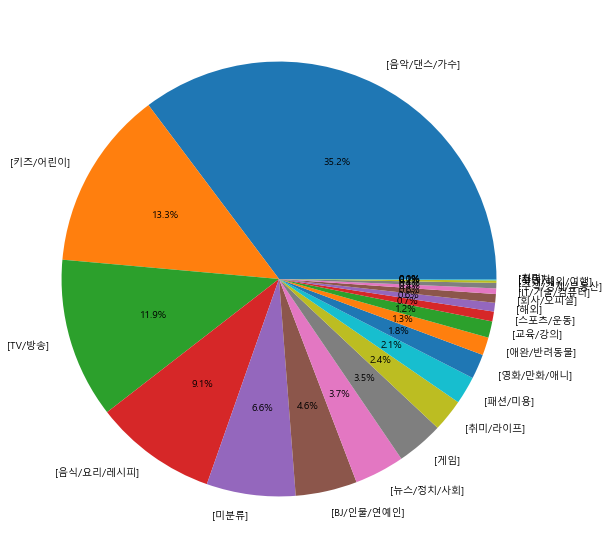

In [108]:
# x축, y축 크기 설정
plt.figure(figsize = (30,10))
# 첫번째 인자: 수치값, 두번째 인자: 각 항목에 표시할 명칭, 세번째 인자: 소수점 한 자리까지 표시
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

#### 카테고리별 채널 수 시각화하기
어떤 카테고리의 채널 수가 많고 적은가?

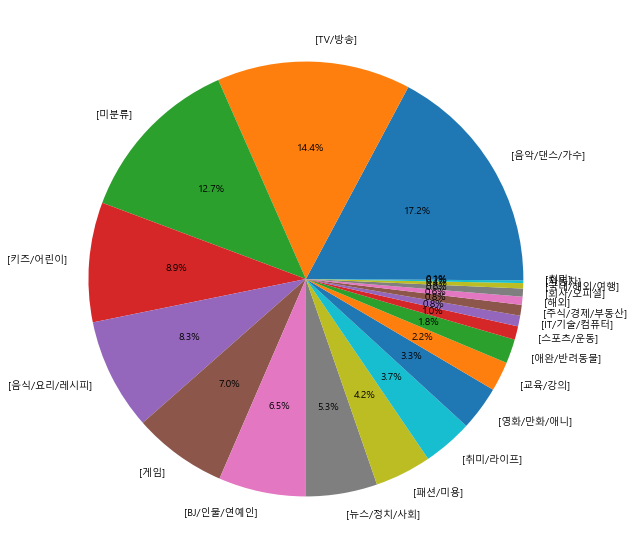

In [109]:
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()